In [214]:
import numpy as np
import pandas as pd

In [215]:
amazon = pd.read_csv(r"D:\Projects\E-commerce\Amazon Sale Report.csv" , low_memory=False)
sales = pd.read_csv(r"D:\Projects\E-commerce\Sale Report.csv" , low_memory=False)
international = pd.read_csv(r"D:\Projects\E-commerce\InternationalsaleReport.csv" , low_memory=False , encoding='latin-1')
march21 = pd.read_csv(r"D:\Projects\E-commerce\P  L March 2021.csv" , low_memory=False)
may22 = pd.read_csv(r"D:\Projects\E-commerce\May-2022.csv" , low_memory=False)
expense = pd.read_csv(r"D:\Projects\E-commerce\Expense IIGF.csv" , low_memory=False)
warehouse = pd.read_csv(r"D:\Projects\E-commerce\Cloud Warehouse Compersion Chart.csv" , low_memory=False , encoding='latin-1')

Amazon

In [217]:
amazon.drop(columns = ["index","B2B","ship-country"],axis=1,inplace = True)
amazon.drop_duplicates()


,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,fulfilled-by
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,NaN,Easy Ship
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,Easy Ship
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,NaN
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,NaN,Easy Ship
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128970,406-6001380-7673107,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,B098112V2V,Shipped,1,INR,517.00,HYDERABAD,TELANGANA,500013.0,NaN,NaN
128971,402-9551604-7544318,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,B09VC6KHX8,Shipped,1,INR,999.00,GURUGRAM,HARYANA,122004.0,IN Core Free Shipping 2015/04/08 23-48-5-108,NaN
128972,407-9547469-3152358,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,B0982YZ51B,Shipped,1,INR,690.00,HYDERABAD,TELANGANA,500049.0,NaN,NaN
128973,402-6184140-0545956,2022-05-31,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,B0894Y2NJQ,Shipped,1,INR,1199.00,Halol,Gujarat,389350.0,IN Core Free Shipping 2015/04/08 23-48-5-108,NaN


In [218]:
amazon["Date"] = pd.to_datetime(amazon["Date"])
amazon.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,promotion-ids,fulfilled-by
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,B09KXVBD7Z,NaN,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,NaN,Easy Ship
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,B09K3WFS32,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,Amazon PLCC Free-Financing Universal Merchant ...,Easy Ship
2,404-0687676-7273146,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,B07WV4JV4D,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN Core Free Shipping 2015/04/08 23-48-5-108,NaN
3,403-9615377-8133951,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,B099NRCT7B,NaN,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,NaN,Easy Ship
4,407-1069790-7240320,2022-04-30,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,B098714BZP,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,NaN,NaN


In [219]:
amazon.dtypes

Order ID                      object
Date                  datetime64[ns]
Status                        object
Fulfilment                    object
Sales Channel                 object
ship-service-level            object
Style                         object
SKU                           object
Category                      object
Size                          object
ASIN                          object
Courier Status                object
Qty                            int64
currency                      object
Amount                       float64
ship-city                     object
ship-state                    object
ship-postal-code             float64
promotion-ids                 object
fulfilled-by                  object
dtype: object

In [220]:
amazon.describe()

,Date,Qty,Amount,ship-postal-code
count,128975,128975.000000,121180.000000,128942.000000
mean,2022-05-12 11:49:27.951928576,0.904431,648.561465,463966.236509
min,2022-03-31 00:00:00,0.000000,0.000000,110001.000000
25%,2022-04-20 00:00:00,1.000000,449.000000,382421.000000
50%,2022-05-10 00:00:00,1.000000,605.000000,500033.000000
75%,2022-06-04 00:00:00,1.000000,788.000000,600024.000000
max,2022-06-29 00:00:00,15.000000,5584.000000,989898.000000
std,NaN,0.313354,281.211687,191476.764941


In [221]:
amazon.describe(include = "O")

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,ASIN,Courier Status,currency,ship-city,ship-state,promotion-ids,fulfilled-by
count,128975,128975,128975,128975,128975,128975,128975,128975,128975,128975,122103,121180,128942,128942,79822,39277
unique,120378,13,2,2,2,1377,7195,9,11,7190,3,1,8955,69,5787,1
top,171-5057375-2831560,Shipped,Amazon,Amazon.in,Expedited,JNE3797,JNE3797-KR-L,Set,M,B09SDXFFQ1,Shipped,INR,BENGALURU,MAHARASHTRA,IN Core Free Shipping 2015/04/08 23-48-5-108,Easy Ship
freq,12,77804,89698,128851,88615,4224,773,50284,22711,773,109487,121180,11217,22260,46100,39277


In [222]:
(amazon["Courier Status"] == "Cancelled").count() == (amazon["Qty"]==0).count() 

True

In [223]:
(amazon["Courier Status"] == "Cancelled").count() == (amazon["Amount"].isnull()).count() 

True

In [224]:
amazon.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status         6872
Qty                       0
currency               7795
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
promotion-ids         49153
fulfilled-by          89698
dtype: int64

In [225]:
amazon["Courier Status"] = amazon["Courier Status"].fillna(amazon["Courier Status"].mode()[0])
amazon["currency"] = amazon["currency"].fillna(amazon["currency"].mode().iloc[0])
amazon.drop("fulfilled-by", axis=1, inplace=True)
amazon.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status            0
Qty                       0
currency                  0
Amount                 7795
ship-city                33
ship-state               33
ship-postal-code         33
promotion-ids         49153
dtype: int64

In [226]:
selling_catgegory_sum = amazon.groupby("Category")["Amount"].sum().sort_values(ascending=False)
selling_catgegory_sum

Category
Set              39204124.03
kurta            21299546.70
Western Dress    11216072.69
Top               5347792.30
Ethnic Dress       791217.66
Blouse             458408.18
Bottom             150667.98
Saree              123933.76
Dupatta               915.00
Name: Amount, dtype: float64

In [227]:
selling_category_mode = amazon.groupby("Category")["Amount"].apply(lambda x: x.mode())
def fill_with_group_mode(group):
    mode = group.mode()
    if not mode.empty:
        return group.fillna(mode.iloc[0]) 
    else:
        return group  
amazon['Amount'] = amazon.groupby('Category')['Amount'].transform(fill_with_group_mode)
amazon.isnull().sum()

Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Style                     0
SKU                       0
Category                  0
Size                      0
ASIN                      0
Courier Status            0
Qty                       0
currency                  0
Amount                    0
ship-city                33
ship-state               33
ship-postal-code         33
promotion-ids         49153
dtype: int64

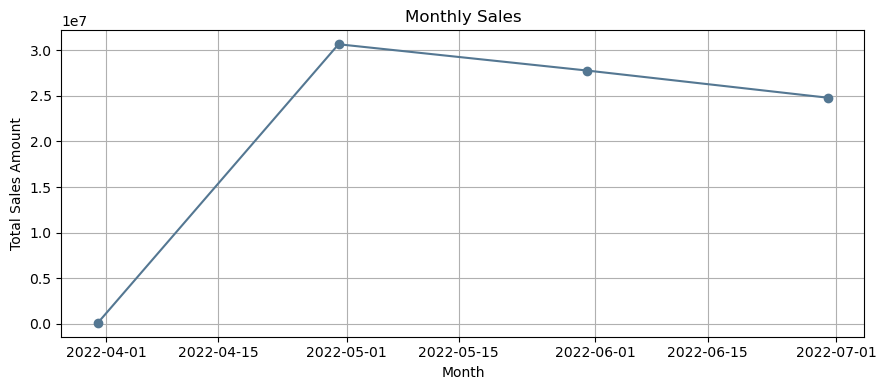

In [228]:
import seaborn as sns
import matplotlib.pyplot as plt

amazon.columns = amazon.columns.str.strip()
monthly_sales = amazon.groupby(pd.Grouper(key='Date', freq='ME'))['Amount'].sum().reset_index()
plt.figure(figsize=(9, 4))
plt.plot(monthly_sales['Date'], monthly_sales['Amount'], marker='o', linestyle='-', color='#547792')
plt.title('Monthly Sales')
plt.xlabel('Month')
plt.grid(True)
plt.ylabel('Total Sales Amount')
plt.tight_layout()
plt.show()

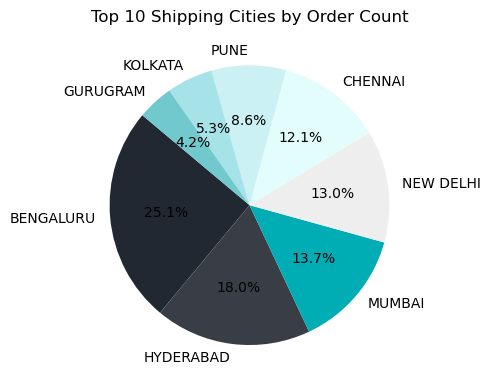

In [229]:
top_cities = amazon['ship-city'].value_counts().nlargest(8)
colors = ['#222831', '#393E46', '#00ADB5', '#EEEEEE', '#E3FDFD',
          '#CBF1F5', '#A6E3E9', '#71C9CE', '#112D4E', '#3F72AF']

plt.figure(figsize=(9, 4))
plt.pie(top_cities, 
        labels=top_cities.index, 
        autopct='%1.1f%%', 
        startangle=140,
        colors=colors)

plt.title('Top 10 Shipping Cities by Order Count')
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Top selling categories'}, xlabel='Category', ylabel='Amount'>

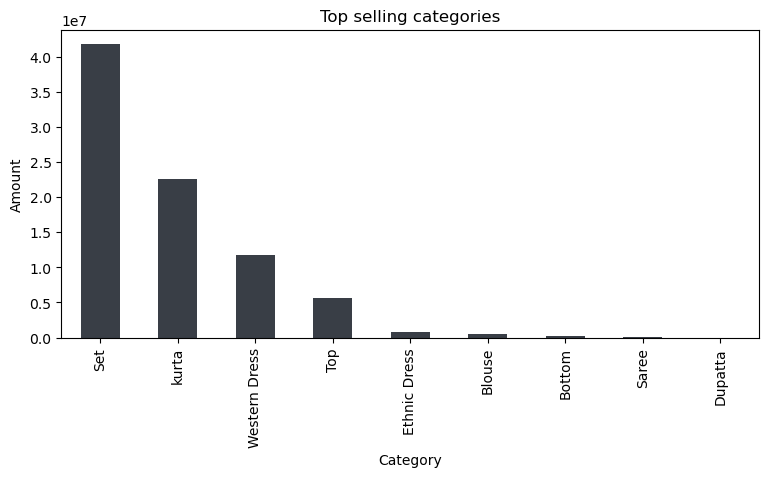

In [230]:
selling_category = amazon.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(10)
selling_category.plot(kind = "bar" , figsize = (9,4) , xlabel = "Category" , ylabel = "Amount" , color = "#393E46" ,title = "Top selling categories")

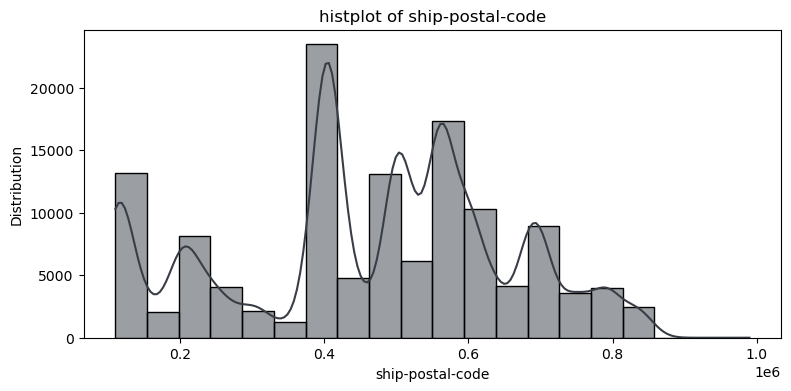

In [231]:
plt.figure(figsize=(9,4))
sns.histplot(amazon["ship-postal-code"], bins=20, kde=True, color="#393E46")
plt.xlabel("ship-postal-code")
plt.ylabel("Distribution")
plt.title("histplot of ship-postal-code")
plt.show()

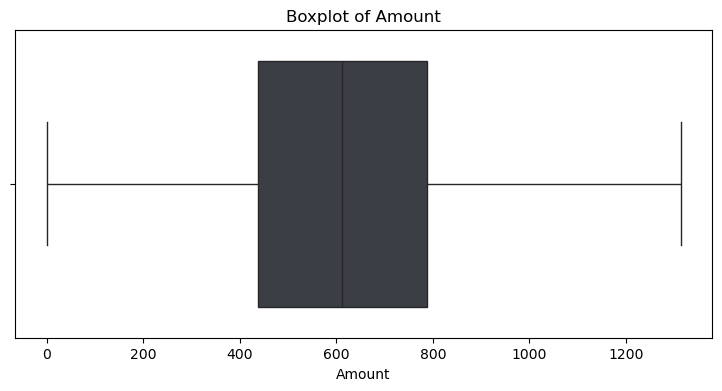

In [232]:
Q1 = amazon["Amount"].quantile(0.25)
Q3 = amazon["Amount"].quantile(0.75)
IQR = Q3 - Q1
upper_bound = Q3 + 1.5 * IQR 
lower_bound = Q1 - 1.5 * IQR 
amazon["Amount"] = amazon["Amount"].clip(lower=lower_bound, upper=upper_bound)
plt.figure(figsize=(9, 4))
sns.boxplot(x=amazon["Amount"], color="#393E46")
plt.title("Boxplot of Amount")
plt.xlabel("Amount")
plt.show()

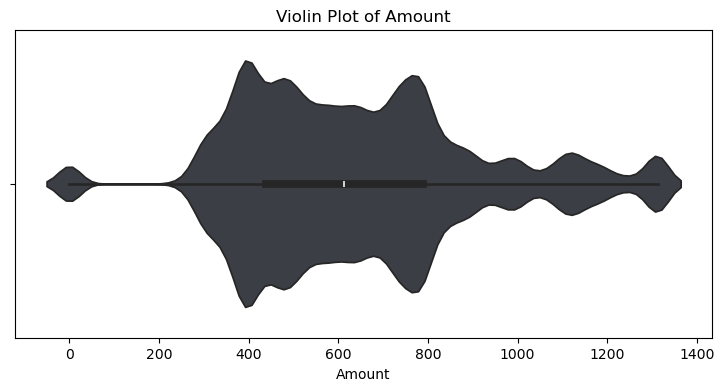

In [233]:
plt.figure(figsize=(9, 4))
sns.violinplot(x=amazon["Amount"], color="#393E46")
plt.title("Violin Plot of Amount")
plt.xlabel("Amount")
plt.show()

March 2021

In [235]:
march21.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sku             1330 non-null   object 
 1   Style Id        1330 non-null   object 
 2   Catalog         1330 non-null   object 
 3   Category        1330 non-null   object 
 4   Weight          1257 non-null   float64
 5   TP 1            1324 non-null   float64
 6   TP 2            1324 non-null   float64
 7   MRP Old         1293 non-null   float64
 8   Final MRP Old   1293 non-null   float64
 9   Ajio MRP        1293 non-null   float64
 10  Amazon MRP      1293 non-null   float64
 11  Amazon FBA MRP  1293 non-null   float64
 12  Flipkart MRP    1293 non-null   float64
 13  Limeroad MRP    1293 non-null   float64
 14  Myntra MRP      1299 non-null   float64
 15  Paytm MRP       1293 non-null   float64
 16  Snapdeal MRP    1293 non-null   float64
dtypes: float64(13), object(4)
memory 

In [236]:
march21.isnull().sum()

Sku                0
Style Id           0
Catalog            0
Category           0
Weight            73
TP 1               6
TP 2               6
MRP Old           37
Final MRP Old     37
Ajio MRP          37
Amazon MRP        37
Amazon FBA MRP    37
Flipkart MRP      37
Limeroad MRP      37
Myntra MRP        31
Paytm MRP         37
Snapdeal MRP      37
dtype: int64

In [237]:
march21['Weight'] = march21['Weight'].interpolate(method='linear')
march21['TP 1'] = march21['TP 1'].interpolate(method='linear')
march21['TP 2'] = march21['TP 2'].interpolate(method='linear')
march21['MRP Old'] = march21['MRP Old'].interpolate(method='linear')
march21['Final MRP Old'] = march21['Final MRP Old'].interpolate(method='linear')
march21['Ajio MRP'] = march21['Ajio MRP'].interpolate(method='linear')
march21['Amazon MRP'] = march21['Amazon MRP'].interpolate(method='linear')
march21['Amazon FBA MRP'] = march21['Amazon FBA MRP'].interpolate(method='linear')
march21['Flipkart MRP'] = march21['Flipkart MRP'].interpolate(method='linear')
march21['Flipkart MRP'] = march21['Flipkart MRP'].interpolate(method='linear')
march21['Limeroad MRP'] = march21['Limeroad MRP'].interpolate(method='linear')
march21['Paytm MRP'] = march21['Paytm MRP'].interpolate(method='linear')
march21['Myntra MRP'] = march21['Myntra MRP'].interpolate(method='linear')
march21['Snapdeal MRP'] = march21['Snapdeal MRP'].interpolate(method='linear')
march21.isnull().sum()

Sku               0
Style Id          0
Catalog           0
Category          0
Weight            0
TP 1              0
TP 2              0
MRP Old           0
Final MRP Old     0
Ajio MRP          0
Amazon MRP        0
Amazon FBA MRP    0
Flipkart MRP      0
Limeroad MRP      0
Myntra MRP        0
Paytm MRP         0
Snapdeal MRP      0
dtype: int64

In [238]:
may22.isnull().sum()

Sku               0
Style Id          0
Catalog           0
Category          0
Weight            0
TP                0
MRP Old           0
Final MRP Old     0
Ajio MRP          0
Amazon MRP        0
Amazon FBA MRP    0
Flipkart MRP      0
Limeroad MRP      0
Myntra MRP        0
Paytm MRP         0
Snapdeal MRP      0
dtype: int64

In [239]:
may22['Weight'] = march21['Weight'].interpolate(method='linear')
may22['TP'] = march21['TP 1'].interpolate(method='linear')
may22['TP 1'] = march21['TP 1'].interpolate(method='linear')
may22['TP 2'] = march21['TP 2'].interpolate(method='linear')
may22['MRP Old'] = march21['MRP Old'].interpolate(method='linear')
may22['Final MRP Old'] = march21['Final MRP Old'].interpolate(method='linear')
may22['Ajio MRP'] = march21['Ajio MRP'].interpolate(method='linear')
may22['Amazon MRP'] = march21['Amazon MRP'].interpolate(method='linear')
may22['Amazon FBA MRP'] = march21['Amazon FBA MRP'].interpolate(method='linear')
may22['Flipkart MRP'] = march21['Flipkart MRP'].interpolate(method='linear')
may22['Flipkart MRP'] = march21['Flipkart MRP'].interpolate(method='linear')
may22['Limeroad MRP'] = march21['Limeroad MRP'].interpolate(method='linear')
may22['Paytm MRP'] = march21['Paytm MRP'].interpolate(method='linear')
may22['Myntra MRP'] = march21['Myntra MRP'].interpolate(method='linear')
may22['Snapdeal MRP'] = march21['Snapdeal MRP'].interpolate(method='linear')
may22.isnull().sum()

Sku               0
Style Id          0
Catalog           0
Category          0
Weight            0
TP                0
MRP Old           0
Final MRP Old     0
Ajio MRP          0
Amazon MRP        0
Amazon FBA MRP    0
Flipkart MRP      0
Limeroad MRP      0
Myntra MRP        0
Paytm MRP         0
Snapdeal MRP      0
TP 1              0
TP 2              0
dtype: int64

<h1>
    Modeling

</h1>

In [241]:
date_dim = pd.to_datetime(amazon['Date']).drop_duplicates().to_frame()
date_dim.columns = ['Date']
date_dim['day'] = date_dim['Date'].dt.day
date_dim['week'] = date_dim['Date'].dt.isocalendar().week
date_dim['month'] = date_dim['Date'].dt.month
date_dim['quarter'] = date_dim['Date'].dt.quarter
date_dim['year'] = date_dim['Date'].dt.year
date_dim.reset_index()

,index,Date,day,week,month,quarter,year
0,0,2022-04-30,30,17,4,2,2022
1,1481,2022-04-29,29,17,4,2,2022
2,2947,2022-04-28,28,17,4,2,2022
3,4363,2022-04-27,27,17,4,2,2022
4,5822,2022-04-26,26,17,4,2,2022
...,...,...,...,...,...,...,...
86,121697,2022-06-05,5,22,6,2,2022
87,123283,2022-06-04,4,22,6,2,2022
88,124720,2022-06-03,3,22,6,2,2022
89,125948,2022-06-02,2,22,6,2,2022


In [242]:
product_dim = amazon.groupby('ASIN').agg({
    'Category': 'first',
    'Size': 'first',
    'Style': 'first'
}).reset_index()
product_dim

,ASIN,Category,Size,Style
0,B01LYC0N7Q,kurta,XL,JNE1233
1,B01LYC0NV1,kurta,XL,JNE1234
2,B01LZMXYSV,kurta,S,JNE1234
3,B01LZYQ93J,kurta,M,JNE1234
4,B01M0LXTZE,kurta,M,JNE1233
...,...,...,...,...
7185,B0B4992J2M,Set,S,SET449
7186,B0B4994HY6,Set,S,SET445
7187,B0B499JD9S,Set,XS,SET446
7188,B0B49CGL99,Set,M,SET449


In [243]:
location_dim = amazon.groupby('ship-postal-code').agg({
    'ship-state': 'first',
    'ship-city': 'first',
    'ship-state' : "first",
}).reset_index()
location_dim

,ship-postal-code,ship-state,ship-city
0,110001.0,DELHI,Delhi
1,110002.0,DELHI,NEW DELHI
2,110003.0,DELHI,NEW DELHI
3,110004.0,DELHI,NEW DELHI
4,110005.0,Delhi,joshi road karol bagh new Delhi
...,...,...,...
9454,855116.0,BIHAR,THAKURGANJ
9455,855117.0,BIHAR,POTHIA
9456,959121.0,APO,APO
9457,984196.0,BIHAR,Purnea


In [244]:
promotion_dim = amazon[['promotion-ids']].drop_duplicates().reset_index().drop(columns="index")
promotion_dim

,promotion-ids
0,NaN
1,Amazon PLCC Free-Financing Universal Merchant ...
2,IN Core Free Shipping 2015/04/08 23-48-5-108
3,Amazon PLCC Free-Financing Universal Merchant ...
4,Amazon PLCC Free-Financing Universal Merchant ...
...,...
5783,Amazon PLCC Free-Financing Universal Merchant ...
5784,Amazon PLCC Free-Financing Universal Merchant ...
5785,Amazon PLCC Free-Financing Universal Merchant ...
5786,Amazon PLCC Free-Financing Universal Merchant ...


In [245]:
product_dim_Style = amazon.groupby('Style').agg({
    'Category': 'first',
    'Size': 'first',
    'SKU': 'first'
}).reset_index()
product_dim_Style

,Style,Category,Size,SKU
0,AN201,Bottom,M,AN201-RED-M
1,AN202,Bottom,XXL,AN202-ORANGE-XXL
2,AN203,Bottom,XXL,AN203-MAROON-XXL
3,AN204,Bottom,L,AN204-PURPLE-L
4,AN205,Bottom,S,AN205-YELLOW-S
...,...,...,...,...
1372,SET445,Set,S,SET445-KR-NP-S
1373,SET446,Set,XS,SET446-KR-NP-XS
1374,SET449,Set,S,SET449-KR-NP-S
1375,SET461,Set,XL,SET461-KR-NP-XL


In [246]:
ship_customer_dim = amazon.groupby("Order ID").agg(
    {"Courier Status":"first","Status":"first","ship-service-level":"first"}).reset_index()
ship_customer_dim

,Order ID,Courier Status,Status,ship-service-level
0,171-0000547-8192359,Shipped,Shipped,Expedited
1,171-0000902-4490745,Unshipped,Cancelled,Expedited
2,171-0001409-6228339,Shipped,Shipped,Expedited
3,171-0003082-5110755,Shipped,Shipped,Expedited
4,171-0003738-2052324,Shipped,Shipped,Expedited
...,...,...,...,...
120373,S02-9578181-3610412,Unshipped,Shipped,Standard
120374,S02-9599483-2736812,Unshipped,Shipping,Standard
120375,S02-9649067-3246849,Unshipped,Shipped,Standard
120376,S02-9736323-0094708,Unshipped,Shipped,Standard


In [247]:
status_dim = amazon.groupby("Status").agg(
    {"Courier Status":"first","ship-service-level":"first"}).reset_index()
status_dim

,Status,Courier Status,ship-service-level
0,Cancelled,Shipped,Standard
1,Pending,Unshipped,Expedited
2,Pending - Waiting for Pick Up,Unshipped,Standard
3,Shipped,Shipped,Expedited
4,Shipped - Damaged,Shipped,Standard
5,Shipped - Delivered to Buyer,Shipped,Standard
6,Shipped - Lost in Transit,Shipped,Standard
7,Shipped - Out for Delivery,Shipped,Standard
8,Shipped - Picked Up,Shipped,Standard
9,Shipped - Rejected by Buyer,Shipped,Standard


In [248]:
Category_dim_may22 = may22.groupby("Category").agg(
    {"Weight":"mean","TP":"mean","MRP Old":"mean","Final MRP Old":"mean","Ajio MRP":"mean","Amazon MRP":"mean","Amazon FBA MRP":"mean","Flipkart MRP":"first","Limeroad MRP":"mean","Myntra MRP":"mean","Paytm MRP":"mean","Snapdeal MRP":"mean"}).reset_index()
Category_dim_may22 = Category_dim_may22[Category_dim_may22["Category"] != "Nill"].reset_index()
Category_dim_may22

,index,Category,Weight,TP,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP
0,0,Gown,0.337500,480.000000,1985.500000,2029.375000,2029.375000,2029.375000,2029.375000,1695.0,2029.375000,2029.375000,2029.375000,2010.625000
1,1,Kurta,0.323415,545.284321,2135.544425,2168.710279,2173.006620,2179.752962,2179.752962,2195.0,2180.955401,2155.741463,2173.638328,2176.809059
2,2,Kurta Set,0.342500,635.535714,2318.329365,2334.968254,2348.301587,2354.968254,2354.968254,1895.0,2335.523810,2314.344444,2336.079365,2334.968254
3,4,Tops,0.277778,441.666667,2093.377778,2106.377778,2106.377778,2106.377778,2106.377778,1895.0,2106.377778,2106.377778,2106.377778,2106.377778


In [251]:
Category_dim_march21 = march21.groupby("Category").agg(
    {"Weight":"mean","MRP Old":"mean","Final MRP Old":"mean","Ajio MRP":"mean","Amazon MRP":"mean","Amazon FBA MRP":"mean","Flipkart MRP":"mean","Limeroad MRP":"mean","Myntra MRP":"mean","Paytm MRP":"mean","Snapdeal MRP":"mean"}).reset_index()
Category_dim_march21

,Category,Weight,MRP Old,Final MRP Old,Ajio MRP,Amazon MRP,Amazon FBA MRP,Flipkart MRP,Limeroad MRP,Myntra MRP,Paytm MRP,Snapdeal MRP
0,Gown,0.4,3151.250000,3151.250000,3151.250000,3151.250000,3151.250000,3151.250000,3151.250000,3151.250000,3151.250000,3151.250000
1,Kurta,0.3,1956.231707,1991.423171,1993.424390,2008.790244,2008.790244,2002.814634,2003.912195,1994.887805,1996.839024,1998.790244
2,Kurta Set,0.4,2728.792148,2743.383372,2756.140878,2746.526559,2746.526559,2745.055427,2743.018476,2694.727483,2743.018476,2743.018476
3,Tops,0.2,1728.333333,1728.333333,1750.555556,1750.555556,1750.555556,1739.444444,1728.333333,1728.555556,1728.333333,1728.333333
